# Frame the Problem
- This model will be used to evaluate the quality of red wine
- Supervised regression model will be used (classification can also be sued)
- The performance will be measured by (R)MSE, R^2, and MAE
- Is the performance measure aligned with the business objective?
- Assumptions: Alcohol might be the most significant indicator

In [29]:
import pandas as pd
import numpy as np

# Import File


In [3]:
wine_tmp = pd.read_csv("/content/drive/MyDrive/Programming/Datasets/Wine_Quality/winequality-red.csv")
wine_tmp.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [4]:
wine = wine_tmp.iloc[:, 0].str.split(';', expand=True)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [5]:
wine_tmp.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

In [6]:
column_names = ["fixed_acidity", "volatile_acidity", "citric_acid",
                "residual_sugar", "chlorides", "free_sulfur_dioxide",
                "total_sulfur_dioxide", "density", "pH", "sulphates",
                "alcohol", "quality"]
wine.columns = column_names

# Look at the Big Picture

In [7]:
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,10.5,5
1595,5.9,0.55,0.1,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
1597,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5


In [8]:
wine = wine.astype("float64")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [9]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


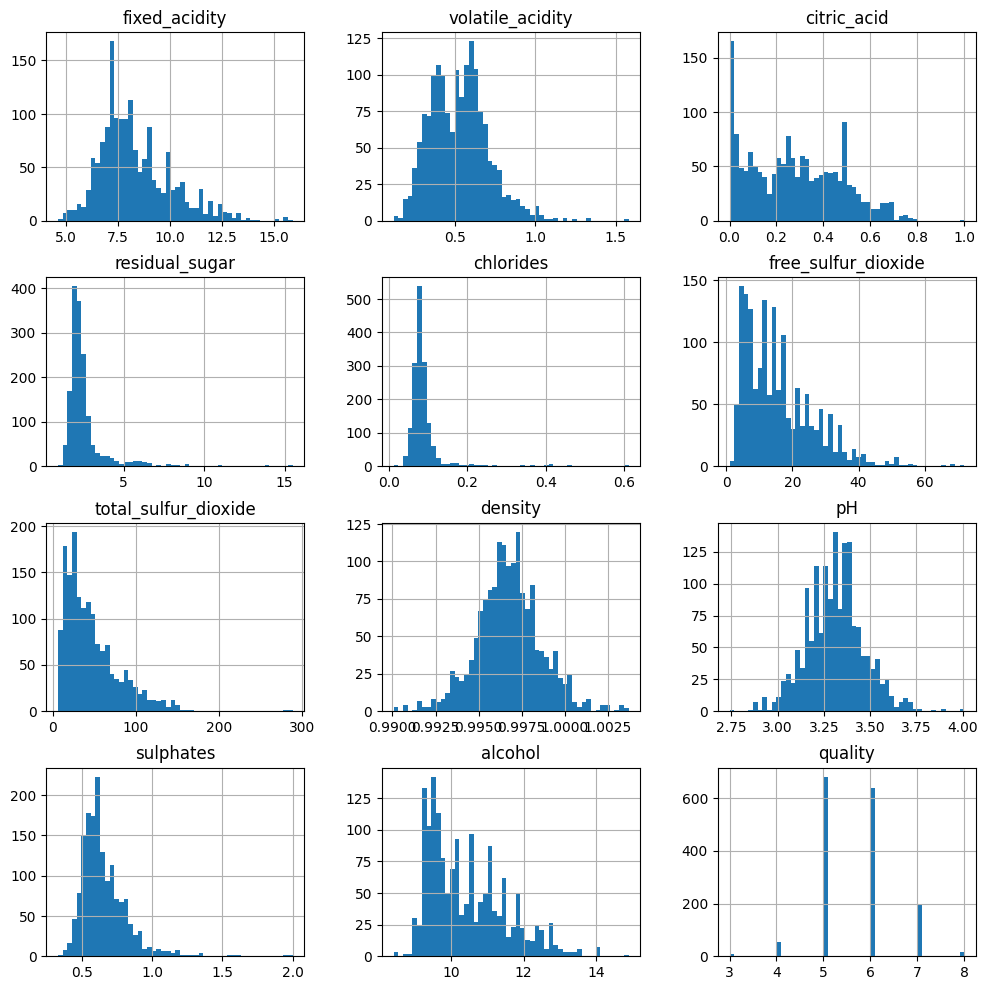

In [14]:
import matplotlib.pyplot as plt
wine.hist(bins=50, figsize=(12,12))
plt.show()

# Create a Test Set

### Observe the most significant influencer

In [16]:
wine.corr()["quality"].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric_acid,0.226373
fixed_acidity,0.124052
residual_sugar,0.013732
free_sulfur_dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


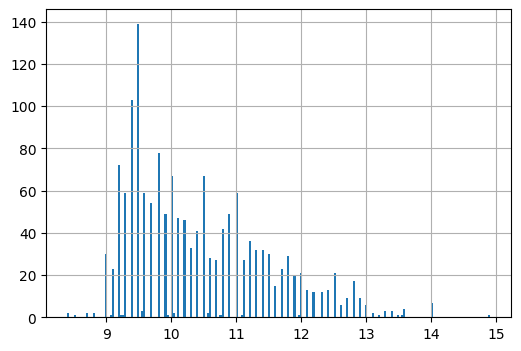

In [23]:
wine.alcohol.hist(bins=200, figsize=(6,4))
plt.show()
# cluster from 9 to 13.5

### Stratified Shuffle Split

In [30]:
wine["alcohol_cat"] = pd.cut(wine['alcohol'],
                             bins=[0., 9.5, 10.5, 11.5, 12.5, np.inf],
                             labels=[1, 2, 3, 4, 5])

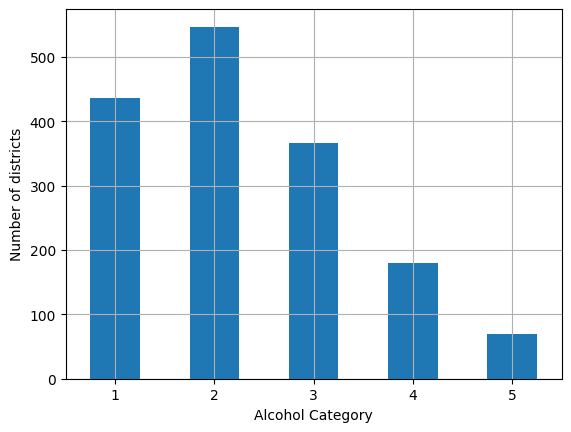

In [32]:
wine['alcohol_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Alcohol Category")
plt.ylabel("Number of districts")
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(wine, test_size=0.2,
                                                   stratify=wine['alcohol_cat'],
                                                   random_state=42)

In [41]:
strat_train_set["alcohol_cat"].value_counts() / len(strat_train_set)

,count
alcohol_cat,
2,0.341673
1,0.272869
3,0.229085
4,0.112588
5,0.043784


In [42]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("alcohol_cat", axis=1, inplace=True)